## Regressão Logística


Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k

![alt text](images/Exam_pass_logistic_curve.svg%20(1).png "Title")



In [14]:
import numpy as np

def sigmoid(z):
    """Função sigmoide."""
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, num_iterations, learning_rate):
    """Algoritmo de regressão logística."""
    num_samples, num_features = X.shape
    
    # Inicializar os parâmetros do modelo
    theta = np.zeros(num_features)
    bias = 0
    
    # Loop de treinamento
    for i in range(num_iterations):
        # Calcular a função logística (sigmoide) dos valores previstos
        z = np.dot(X, theta) + bias
        y_pred = sigmoid(z)
        
        # Calcular o gradiente e atualizar os parâmetros
        gradient = (1 / num_samples) * np.dot(X.T, (y_pred - y))
        theta -= learning_rate * gradient
        bias -= learning_rate * np.mean(y_pred - y)
        
    return theta, bias

# Dados de treinamento
X_train = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3]])
y_train = np.array([0, 0, 0, 1, 1])

# Hiperparâmetros
num_iterations = 1000
learning_rate = 0.1

# Executar o algoritmo de regressão logística
theta, bias = logistic_regression(X_train, y_train, num_iterations, learning_rate)

# Dados de teste
X_test = np.array([[2, 2], [6, 2]])
y_test = np.array([0, 1])

# Fazer previsões nos dados de teste
z_test = np.dot(X_test, theta) + bias
y_pred = sigmoid(z_test)
print(y_pred)
# Arredondar as previsões para obter os rótulos binários
y_pred = np.round(y_pred)

# Imprimir as previsões
print("Previsões:", y_pred)

# Calcular a acurácia do modelo
accuracy = np.mean(y_pred == y_test)
print("Acurácia:", accuracy)


[0.10440215 0.97973256]
Previsões: [0. 1.]
Acurácia: 1.0


In [13]:
y_pred

array([0., 1.])

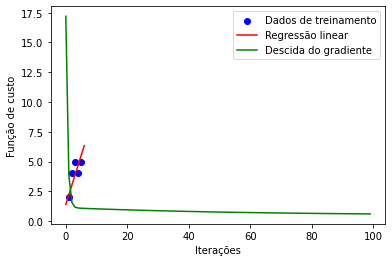

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples = len(y)
    theta0 = 0  # Parâmetro theta0
    theta1 = 0  # Parâmetro theta1
    cost_history = []  # Armazena os valores da função de custo

    for i in range(num_iterations):
        y_pred = theta0 + theta1 * X  # Valor previsto pela regressão linear
        error = y_pred - y  # Erro entre o valor previsto e o valor real
        
        # Atualizar os parâmetros theta0 e theta1 usando a regra do gradiente descendente
        theta0 -= (learning_rate / num_samples) * np.sum(error)
        theta1 -= (learning_rate / num_samples) * np.sum(error * X)
        
        # Calcular a função de custo (erro médio quadrático)
        cost = np.mean(error**2)
        cost_history.append(cost)

    return theta0, theta1, cost_history

# Dados de exemplo
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Hiperparâmetros
learning_rate = 0.05
num_iterations = 100

# Executar o gradiente descendente
theta0, theta1, cost_history = gradient_descent(X, y, learning_rate, num_iterations)

# Plotar os pontos de dados
plt.scatter(X, y, color='blue', label='Dados de treinamento')

# Plotar a reta de regressão
x_line = np.linspace(0, 6, 100)
y_line = theta0 + theta1 * x_line
plt.plot(x_line, y_line, color='red', label='Regressão linear')

# Plotar a descida do gradiente
plt.plot(range(num_iterations), cost_history, color='green', label='Descida do gradiente')

plt.xlabel('Iterações')
plt.ylabel('Função de custo')
plt.legend()
plt.show()


In [15]:
import numpy as np
import plotly.graph_objects as go

def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples = len(y)
    theta0 = 0  # Parâmetro theta0
    theta1 = 0  # Parâmetro theta1
    cost_history = []

    for i in range(num_iterations):
        y_pred = theta0 + theta1 * X  # Valor previsto pela regressão linear
        error = y_pred - y  # Erro entre o valor previsto e o valor real
        
        # Atualizar os parâmetros theta0 e theta1 usando a regra do gradiente descendente
        gradient0 = (1 / num_samples) * np.sum(error)
        gradient1 = (1 / num_samples) * np.sum(error * X)
        theta0 -= learning_rate * gradient0
        theta1 -= learning_rate * gradient1
        
        # Calcular a função de custo (erro médio quadrático)
        cost = np.mean(error**2)
        cost_history.append(cost)

    return theta0, theta1, cost_history

# Dados de exemplo
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Hiperparâmetros
learning_rate = 0.05
num_iterations = 100

# Executar o gradiente descendente
theta0, theta1, cost_history = gradient_descent(X, y, learning_rate, num_iterations)

# Preparar os dados para plotagem
theta0_vals = np.linspace(-2, 4, 100)
theta1_vals = np.linspace(-1, 3, 100)
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
cost_vals = np.zeros_like(theta0_vals)

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta_vals = np.array([theta0_vals[i, j], theta1_vals[i, j]])
        y_pred = theta_vals[0] + theta_vals[1] * X
        error = y_pred - y
        cost_vals[i, j] = np.mean(error**2)

# Plotar o gradiente descendente em 3D com Plotly
fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=cost_vals)])
fig.update_layout(scene=dict(
                    xaxis_title='Theta 0',
                    yaxis_title='Theta 1',
                    zaxis_title='Função de custo'),
                  title='Descida do gradiente')
fig.show()


In [16]:
import numpy as np
import plotly.graph_objects as go

def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples = len(y)
    theta0 = 0  # Parâmetro theta0
    theta1 = 0  # Parâmetro theta1
    theta0_history = [theta0]  # Histórico de valores de theta0
    theta1_history = [theta1]  # Histórico de valores de theta1

    for i in range(num_iterations):
        y_pred = theta0 + theta1 * X  # Valor previsto pela regressão linear
        error = y_pred - y  # Erro entre o valor previsto e o valor real
        
        # Atualizar os parâmetros theta0 e theta1 usando a regra do gradiente descendente
        gradient0 = (1 / num_samples) * np.sum(error)
        gradient1 = (1 / num_samples) * np.sum(error * X)
        theta0 -= learning_rate * gradient0
        theta1 -= learning_rate * gradient1
        
        theta0_history.append(theta0)
        theta1_history.append(theta1)

    return theta0_history, theta1_history

# Dados de exemplo
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Hiperparâmetros
learning_rate = 0.05
num_iterations = 100

# Executar o gradiente descendente
theta0_history, theta1_history = gradient_descent(X, y, learning_rate, num_iterations)

# Criar figura do Plotly
fig = go.Figure()

# Adicionar linha de gradiente descendente
fig.add_trace(go.Scatter3d(
    x=theta0_history,
    y=theta1_history,
    z=np.arange(num_iterations + 1),
    mode='lines',
    line=dict(color='blue', width=2),
    name='Gradiente Descendente'
))

# Adicionar ponto final do gradiente descendente
fig.add_trace(go.Scatter3d(
    x=[theta0_history[-1]],
    y=[theta1_history[-1]],
    z=[num_iterations],
    mode='markers',
    marker=dict(color='red', size=5),
    name='Resultado final'
))

# Configurar layout do gráfico
fig.update_layout(
    scene=dict(
        xaxis_title='Theta 0',
        yaxis_title='Theta 1',
        zaxis_title='Iterações'
    ),
    title='Evolução dos parâmetros durante o Gradiente Descendente'
)

# Exibir gráfico
fig.show()


## Dataframe

Pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [17]:
#!pip install pandas

In [18]:
import pandas as pd

In [21]:
df=pd.DataFrame(data={'id_aluno':[1,2,3],'horas_estudadas':[10,20,30],'notas':[10,8,6],'horas_procastinadas':[1,2,3],'estuda_outra_materia':[0,1,1],'passou_de_ano':[1,0,0],'materia':['Cálculo','Física Moderna','Eletromagnetismo']})
df

,id_aluno,horas_estudadas,notas,horas_procastinadas,estuda_outra_materia,passou_de_ano,materia
0,1,10,10,1,0,1,Cálculo
1,2,20,8,2,1,0,Física Moderna
2,3,30,6,3,1,0,Eletromagnetismo


In [22]:
df.head()

,id_aluno,horas_estudadas,notas,horas_procastinadas,estuda_outra_materia,passou_de_ano,materia
0,1,10,10,1,0,1,Cálculo
1,2,20,8,2,1,0,Física Moderna
2,3,30,6,3,1,0,Eletromagnetismo


In [23]:
df_titanic = pd.read_csv('dataset/gender_submission.csv')
df_titanic.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [24]:
df_titanic

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [25]:
df_titanic.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [27]:
df[['id_aluno','horas_estudadas','notas']]

,id_aluno,horas_estudadas,notas
0,1,10,10
1,2,20,8
2,3,30,6


In [28]:
df[['passou_de_ano']]

,passou_de_ano
0,1
1,0
2,0
